# Montando o drive, importando bibliotecas e dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 16.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/Alura/Python para Data Science/Seaborn/data/tips_atualizado.csv', sep = ',')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Renomeando os Dados para Português

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill' : 'Valor_Total_da_Conta',
    'tip' : 'Gorjeta',
    'dessert' : 'Sobremesa',
    'day' : 'Dia_da_Semana',
    'time' : 'Hora_do_Dia',
    'size' : 'Total_de_Pessoas'
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas['Sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
gorjetas['Dia_da_Semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
gorjetas['Hora_do_Dia'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [12]:
tem_sobremesa = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [13]:
gorjetas['Sobremesa'] = gorjetas['Sobremesa'].map(tem_sobremesa)
gorjetas['Dia_da_Semana'] = gorjetas['Dia_da_Semana'].map(dias)
gorjetas['Hora_do_Dia'] = gorjetas['Hora_do_Dia'].map(hora)

In [14]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise I

Valor da conta e gorjeta

In [15]:
gorjetas.columns

Index(['Valor_Total_da_Conta', 'Gorjeta', 'Sobremesa', 'Dia_da_Semana',
       'Hora_do_Dia', 'Total_de_Pessoas'],
      dtype='object')

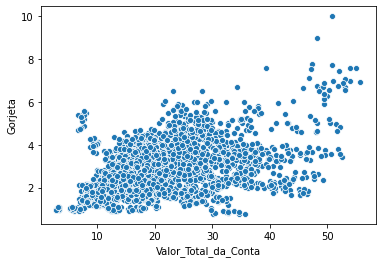

In [16]:
gorjeta_scatter = sns.scatterplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', data = gorjetas)

Visualmente o valor da gorjeta aumenta conforme o valor da conta 

In [17]:
print('A base de dados contém {} registros.\n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros.

Registros não nulos


Valor_Total_da_Conta    3416
Gorjeta                 3416
Sobremesa               3416
Dia_da_Semana           3416
Hora_do_Dia             3416
Total_de_Pessoas        3416
dtype: int64

## Criando o campo Porcentagem

In [18]:
gorjetas['Porcentagem'] = gorjetas['Gorjeta'] / gorjetas['Valor_Total_da_Conta']

In [19]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [20]:
gorjetas['Porcentagem'] = gorjetas['Porcentagem'].round(2)

In [21]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


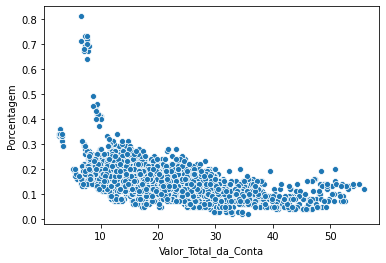

In [22]:
porcentagem_conta = sns.scatterplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', data = gorjetas)

Visualmente o valor da conta não é proporcional ao valor da gorjeta

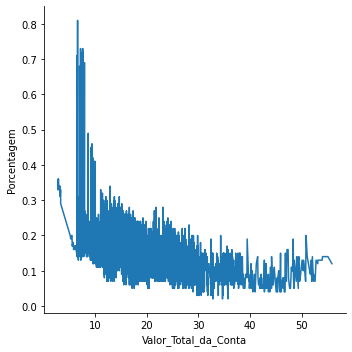

In [23]:
porcentagem_conta_linha = sns.relplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', kind = 'line', data = gorjetas)

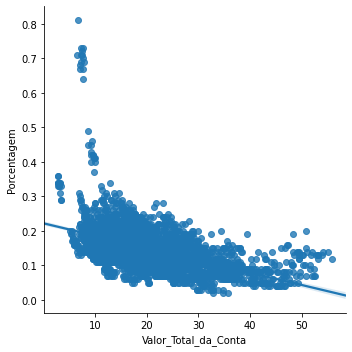

In [24]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', data = gorjetas)

# Análise II

Sobremesas

In [25]:
gorjetas[gorjetas['Sobremesa'] == 'Sim'].describe()

,Valor_Total_da_Conta,Gorjeta,Total_de_Pessoas,Porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [26]:
gorjetas[gorjetas['Sobremesa'] == 'Não'].describe()

,Valor_Total_da_Conta,Gorjeta,Total_de_Pessoas,Porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


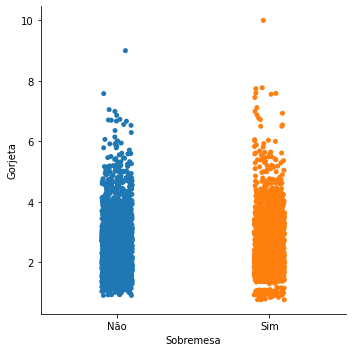

In [27]:
sns.catplot(x = 'Sobremesa', y = 'Gorjeta', data = gorjetas)

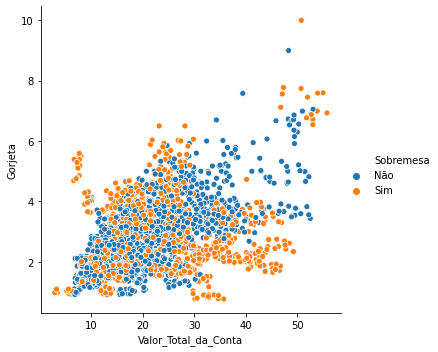

In [28]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', data = gorjetas)

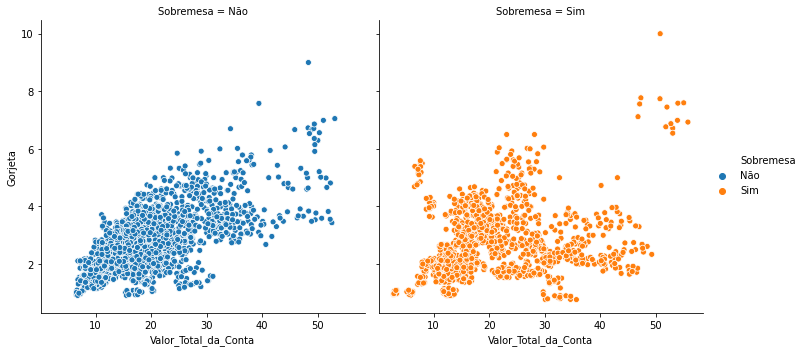

In [29]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = gorjetas)

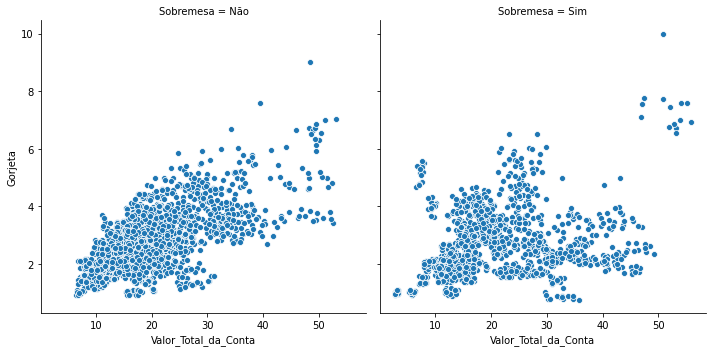

In [30]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', col = 'Sobremesa', data = gorjetas)

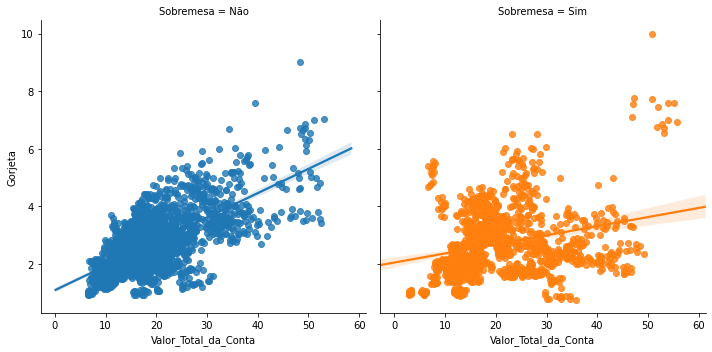

In [31]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = gorjetas)

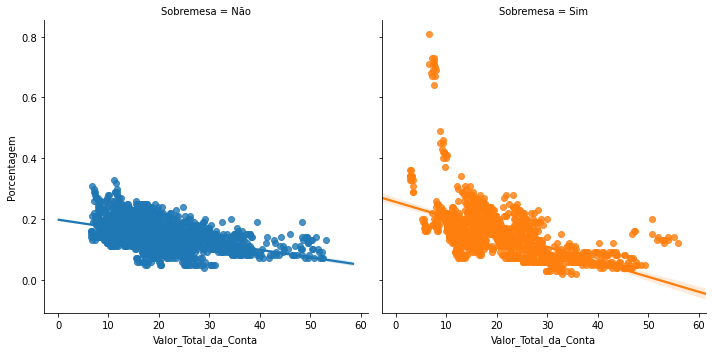

In [32]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Sobremesa', col = 'Sobremesa', data = gorjetas)

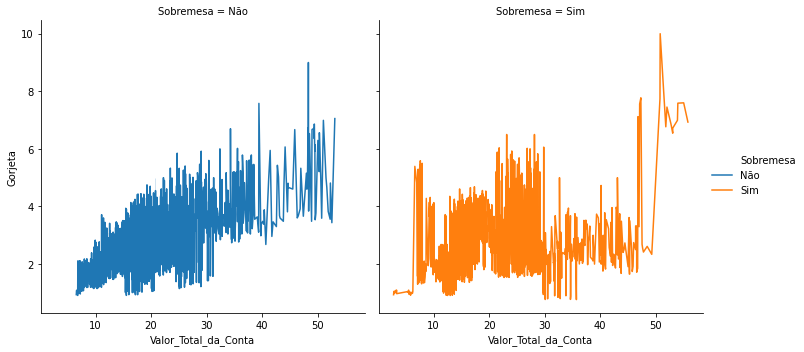

In [33]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', kind = 'line', data = gorjetas)

**Visualmente existe diferença entre aquele que pediram sobremesa e não pediram**

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição da taxa de gorjeta é a mesma nos dois grupos**

**H<sup>alt<sup>**
> **A distribuição da taxa de gorjeta não é a mesma nos dois grupos**

In [34]:
from scipy.stats import ranksums

In [35]:
com_sobremesa = gorjetas.query("Sobremesa == 'Sim'")['Porcentagem']
sem_sobremesa = gorjetas.query("Sobremesa == 'Não'")['Porcentagem']

In [36]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [37]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.033144013617673405


p-value é menor que 5%, logo a hipótese nula deve ser descartada.

"O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade."

**H<sup>alt<sup>**
> **A distribuição da taxa de gorjeta não é a mesma nos dois grupos**

In [38]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise III

In [39]:
gorjetas['Dia_da_Semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

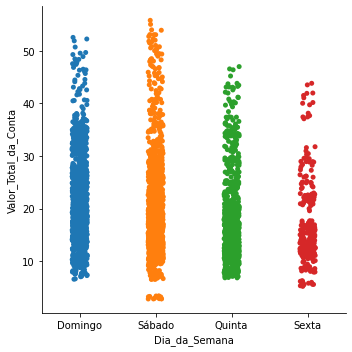

In [40]:
sns.catplot(x = 'Dia_da_Semana', y = 'Valor_Total_da_Conta', data = gorjetas)

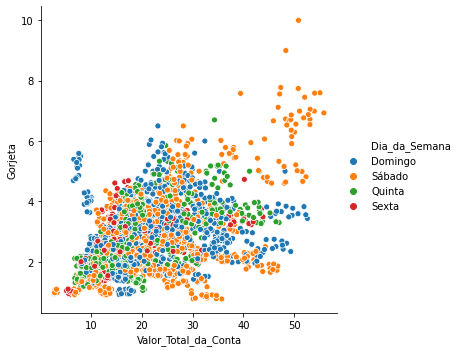

In [41]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', data = gorjetas)

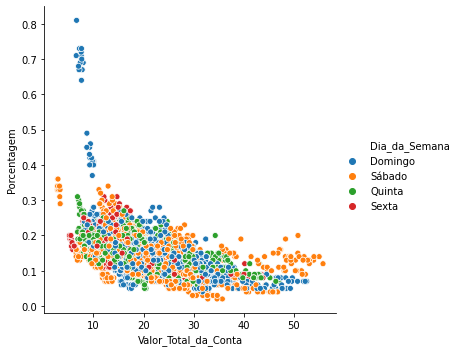

In [42]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', data = gorjetas)

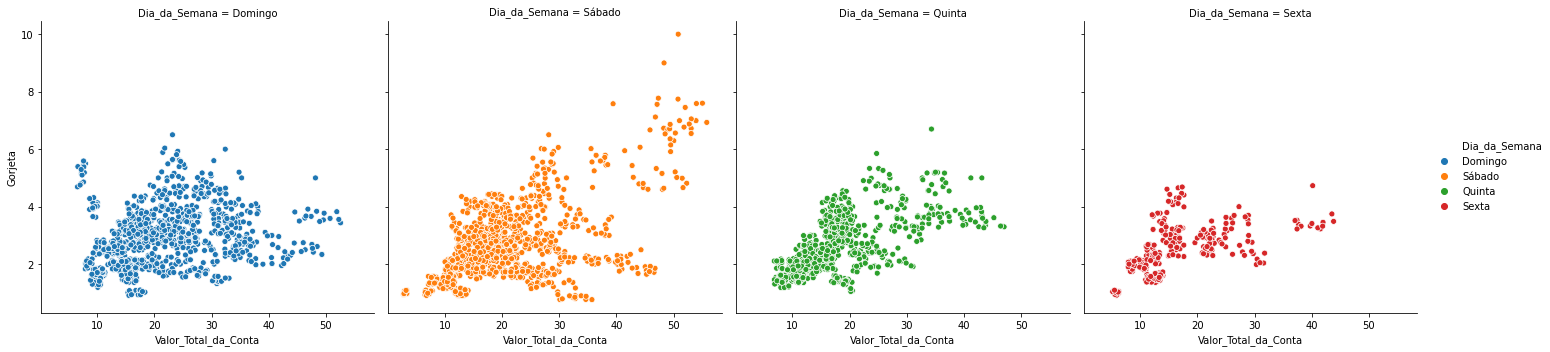

In [43]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

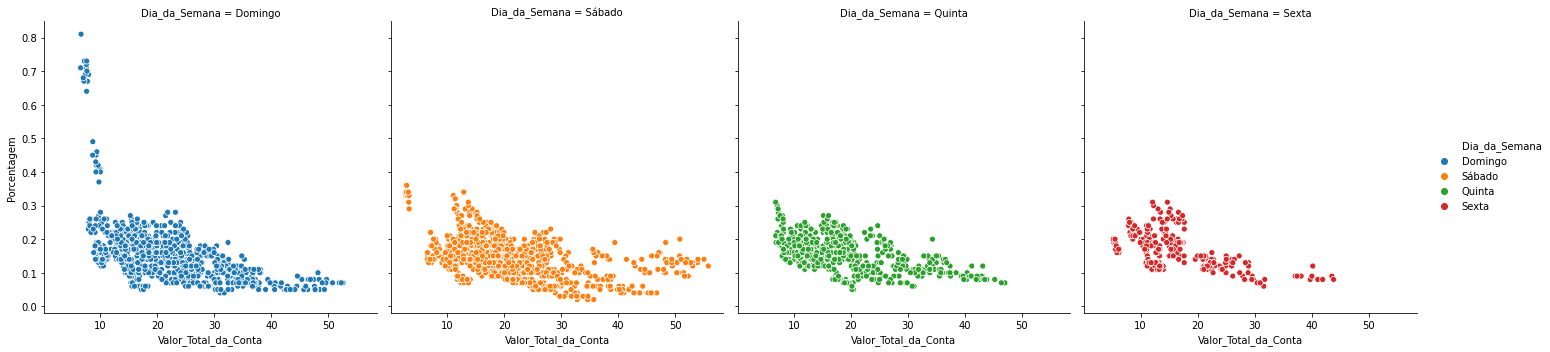

In [44]:
sns.relplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

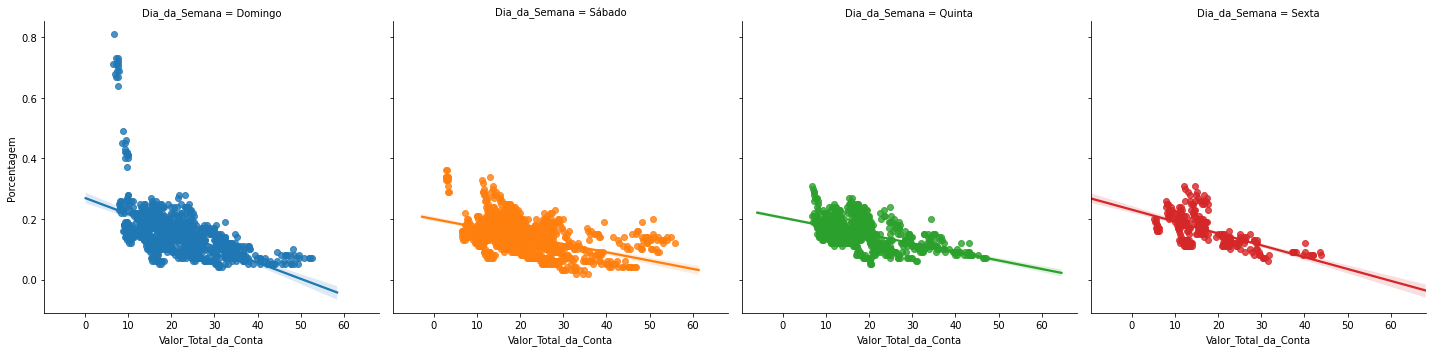

In [45]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

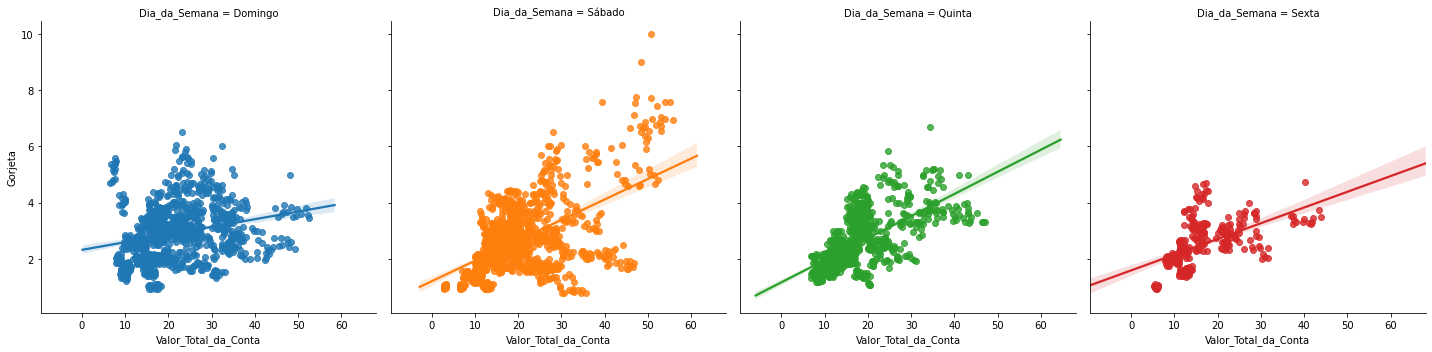

In [46]:
sns.lmplot(x = 'Valor_Total_da_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', col = 'Dia_da_Semana',data = gorjetas)

In [47]:
media_geral_gorjetas = gorjetas['Gorjeta'].mean()

In [48]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.711189214091612


In [49]:
gorjetas.groupby(['Dia_da_Semana']).mean()[['Valor_Total_da_Conta', 'Gorjeta', 'Porcentagem']]

,Valor_Total_da_Conta,Gorjeta,Porcentagem
Dia_da_Semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [50]:
print('Frequência dos dias')
gorjetas['Dia_da_Semana'].value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: Dia_da_Semana, dtype: int64

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt<sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [51]:
valor_conta_domingo = gorjetas.query("Dia_da_Semana == 'Domingo'")['Valor_Total_da_Conta']

In [52]:
valor_conta_sabado = gorjetas.query("Dia_da_Semana == 'Sábado'")['Valor_Total_da_Conta']

In [53]:
r2 = ranksums(valor_conta_sabado, valor_conta_domingo)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


**H<sup>alt<sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [54]:
gorjetas.head()

,Valor_Total_da_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise IV

In [55]:
gorjetas['Hora_do_Dia'].unique()

array(['Jantar', 'Almoço'], dtype=object)

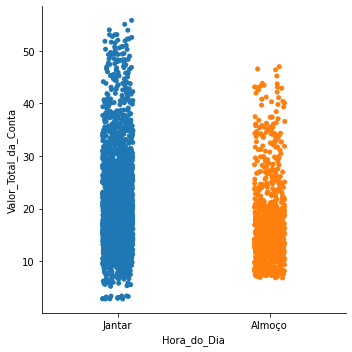

In [56]:
sns.catplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', data = gorjetas)

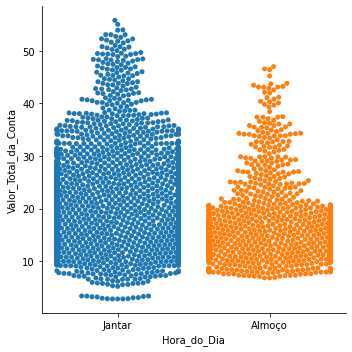

In [57]:
sns.catplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', kind = 'swarm', data = gorjetas)

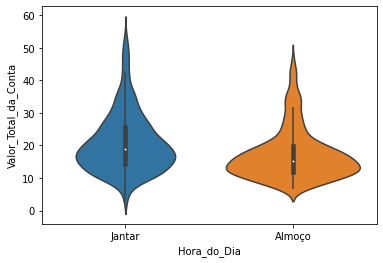

In [58]:
sns.violinplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', data = gorjetas)

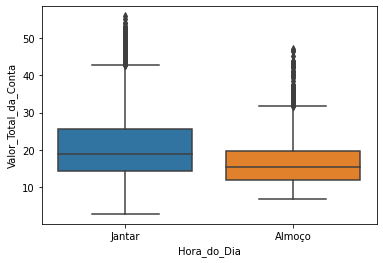

In [59]:
sns.boxplot(x = 'Hora_do_Dia', y = 'Valor_Total_da_Conta', data = gorjetas)

In [60]:
almoco = gorjetas.query("Hora_do_Dia == 'Almoço'")['Valor_Total_da_Conta']

In [61]:
jantar = gorjetas.query("Hora_do_Dia == 'Jantar'")['Valor_Total_da_Conta']

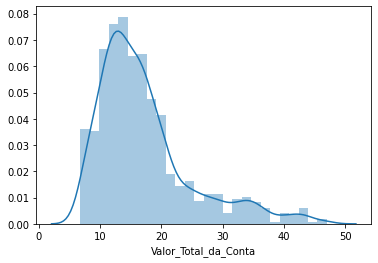

In [62]:
sns.distplot(almoco)

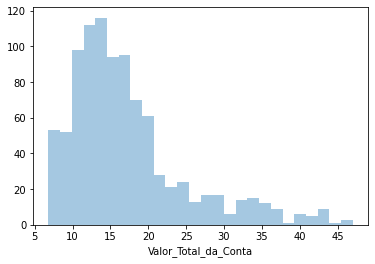

In [63]:
sns.distplot(almoco, kde = False)

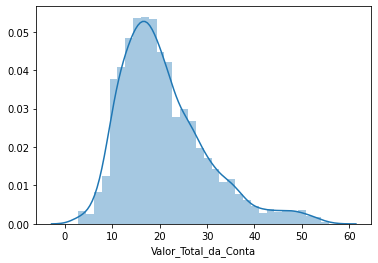

In [64]:
sns.distplot(jantar)

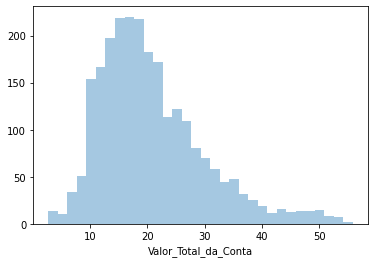

In [65]:
sns.distplot(jantar, kde = False)

# Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt<sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [66]:
gorjetas.groupby(['Hora_do_Dia']).mean()[['Valor_Total_da_Conta', 'Gorjeta', 'Porcentagem']]

,Valor_Total_da_Conta,Gorjeta,Porcentagem
Hora_do_Dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


In [67]:
r3 = ranksums(jantar, almoco)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 5.169201062207143e-34


**H<sup>null<sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

## Teste de Hipótese

**H<sup>null<sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt<sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [68]:
porcentagem_almoco = gorjetas.query("Hora_do_Dia == 'Almoço'")['Porcentagem']

In [69]:
porcentagem_jantar = gorjetas.query("Hora_do_Dia == 'Jantar'")['Porcentagem']

In [70]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 1.3785725618355523e-11


**H<sup>null<sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**